In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("/Users/henrybest/PythonStuff/Code/")
from Amoeba.amoeba.Util.util import (
    generate_signal_from_psd,
    convolve_signal_with_transfer_function,
)
from scipy.signal import convolve
from scipy.interpolate import interp1d

In [363]:
length_of_light_curve = 5 * 365  # days
frequencies = np.linspace(1 / (2 * length_of_light_curve), 1 / 2, length_of_light_curve)
power_1 = 1.5
breakpoint_freq = 1 / 1000
power_spectrum = frequencies ** (-power_1)
my_signal = generate_signal_from_psd(
    length_of_light_curve, power_spectrum, frequencies, random_seed=None
)

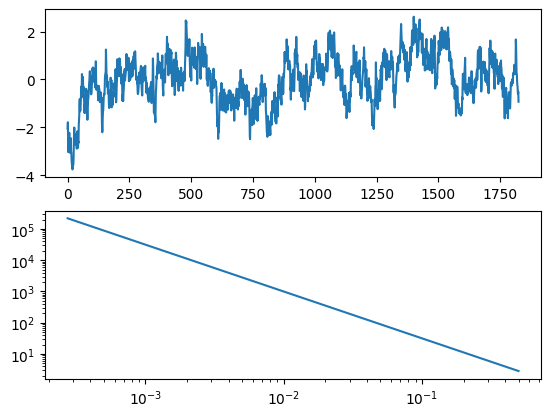

In [364]:
fig, ax = plt.subplots(2)
ax[0].plot(my_signal)
ax[1].loglog(frequencies, power_spectrum)
plt.show()

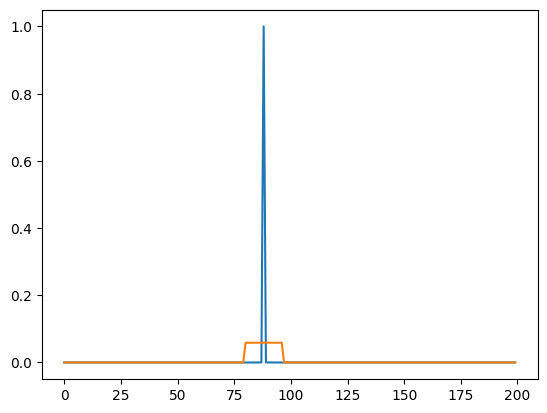

In [365]:
transfer_function1 = np.zeros(200)
transfer_function1[88] = 1
transfer_function2 = np.zeros(200)
transfer_function2[80:97] = 1
transfer_function2 /= np.sum(transfer_function2)

plt.plot(transfer_function1)
plt.plot(transfer_function2)

In [366]:
mexp = 8.5
redshift = 0
cadence = 0.5

tax1, signal1 = convolve_signal_with_transfer_function(
    mass_exponent=mexp,
    driving_signal=my_signal,
    transfer_function=transfer_function1,
    redshift=redshift,
    desired_cadence_in_days=cadence,
)

tax2, signal2 = convolve_signal_with_transfer_function(
    mass_exponent=mexp,
    driving_signal=my_signal,
    transfer_function=transfer_function2,
    redshift=redshift,
    desired_cadence_in_days=cadence,
)

signal1 = convolve(transfer_function1, my_signal)[: len(my_signal)]
signal2 = convolve(transfer_function2, my_signal)[: len(my_signal)]


signal1 /= np.std(signal1)
signal2 /= np.std(signal2)

# interp_1 = interp1d(tax1, signal1, bounds_error=False, fill_value='extrapolate')
# interp_2 = interp1d(tax2, signal2, bounds_error=False, fill_value='extrapolate')

tax = np.linspace(0, len(my_signal) - 1, len(my_signal))

# daily_signal_1 = interp_1(tax)
# daily_signal_2 = interp_2(tax)

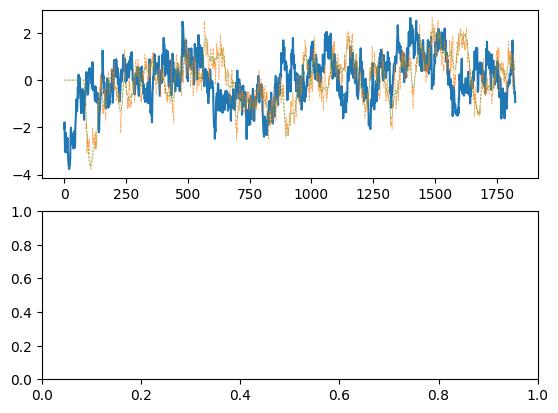

In [367]:
fig, ax = plt.subplots(2)
ax[0].plot(my_signal)
ax[0].plot(tax, signal1, "--", linewidth=0.5, alpha=0.7)
ax[0].plot(tax, signal2, "--", linewidth=0.5, alpha=0.7)

# ax[1].plot(tax, daily_signal_1)
# ax[1].plot(tax, daily_signal_2)
plt.show()

In [368]:
ccf_driving_1 = convolve(
    my_signal / np.max(abs(my_signal)), daily_signal_1 / np.max(abs(daily_signal_1))
)
ccf_driving_2 = convolve(
    my_signal / np.max(abs(my_signal)), daily_signal_2 / np.max(abs(daily_signal_2))
)
ccf_1_2 = convolve(
    daily_signal_1 / np.max(abs(daily_signal_1)),
    daily_signal_2 / np.max(abs(daily_signal_2)),
)

tau_ax = np.linspace(-len(my_signal), len(my_signal), 2 * len(my_signal) - 1)

ValueError: x and y must have same first dimension, but have shapes (3649,) and (2189,)

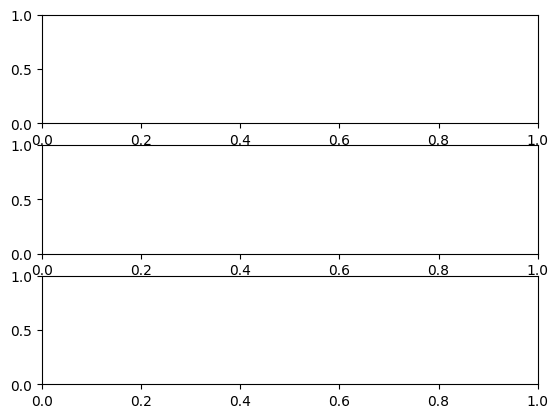

In [369]:
fig, ax = plt.subplots(3)
ax[0].plot(tau_ax, ccf_driving_1)
ax[1].plot(tau_ax, ccf_driving_2)
ax[2].plot(tau_ax, ccf_1_2)
plt.show()

In [370]:
arg_driving_1 = np.argmax(abs(ccf_driving_1))
arg_driving_2 = np.argmax(abs(ccf_driving_2))
arg_1_2 = np.argmax(abs(ccf_1_2))

print("discovered lags")
print("---------------")
print("driving - 1 :", tau_ax[arg_driving_1])
print("driving - 2 :", tau_ax[arg_driving_2])
print("1 - 2 :", tau_ax[arg_1_2])

discovered lags
---------------
driving - 1 : -1825.0
driving - 2 : -1825.0
1 - 2 : -1825.0


discovered lags
---------------
driving - 1 : 422.2313596491226
driving - 2 : 415.22752192982443
1 - 2 : 476.26096491228054


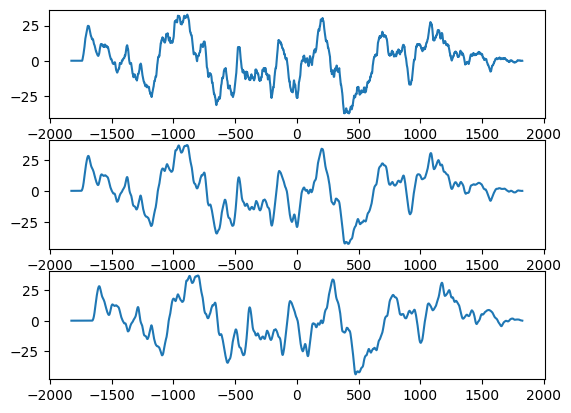

In [371]:
ccf_driving_1 = convolve(
    my_signal / np.max(abs(my_signal)), signal1 / np.max(abs(signal1))
)
ccf_driving_2 = convolve(
    my_signal / np.max(abs(my_signal)), signal2 / np.max(abs(signal2))
)
ccf_1_2 = convolve(signal1 / np.max(abs(signal1)), signal2 / np.max(abs(signal2)))

tau_ax = np.linspace(-len(my_signal), len(my_signal), 2 * len(my_signal) - 1)

arg_driving_1 = np.argmax(abs(ccf_driving_1))
arg_driving_2 = np.argmax(abs(ccf_driving_2))
arg_1_2 = np.argmax(abs(ccf_1_2))

print("discovered lags")
print("---------------")
print("driving - 1 :", tau_ax[arg_driving_1])
print("driving - 2 :", tau_ax[arg_driving_2])
print("1 - 2 :", tau_ax[arg_1_2])
fig, ax = plt.subplots(3)
ax[0].plot(tau_ax, ccf_driving_1)
ax[1].plot(tau_ax, ccf_driving_2)
ax[2].plot(tau_ax, ccf_1_2)
plt.show()